# STEP 1: Setup


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


# STEP 2: Step 2: Load Data (use uploaded files)

In [44]:
from google.colab import files
uploaded = files.upload()


Saving historical_data.csv to historical_data (1).csv
Saving fear_greed_index.csv to fear_greed_index (1).csv


In [29]:

trader_data = pd.read_csv('historical_data.csv')
sentiment_data = pd.read_csv('fear_greed_index.csv')

# Step 3: Parse Dates Properly



In [34]:
# ✅ Use 'Timestamp IST' since 'Timestamp' is invalid
trader_data['Timestamp'] = pd.to_datetime(trader_data['Timestamp IST'], errors='coerce')
trader_data['date'] = trader_data['Timestamp'].dt.date

# ✅ Format sentiment dates and clean classification
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], errors='coerce').dt.date
sentiment_data['classification'] = sentiment_data['classification'].str.strip().str.title()


# Step 4: Filter Trader Data by Valid Sentiment Dates

In [35]:
# Keep only records that have a matching sentiment date
valid_dates = sentiment_data['date'].unique()
trader_data = trader_data[trader_data['date'].isin(valid_dates)]


#  STEP 5: Merge the Datasets

In [36]:
# Merge trader data with sentiment
df = pd.merge(trader_data, sentiment_data[['date', 'classification']], on='date', how='left')

# Check if merge worked
print("✅ Sentiment distribution:")
print(df['classification'].value_counts(dropna=False))


✅ Sentiment distribution:
classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


# Step 6: Preview Cleaned Merged Data


In [37]:
# Show a few rows
df[['Account', 'Execution Price', 'Size USD', 'Side', 'Closed PnL', 'classification']].head()


,Account,Execution Price,Size USD,Side,Closed PnL,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9769,7872.16,BUY,0.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9800,127.68,BUY,0.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9855,1150.63,BUY,0.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9874,1142.04,BUY,0.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9894,69.75,BUY,0.0,Greed


# Step 7: Visual Analysis (EDA)

## 7.1 – Market Sentiment Distribution

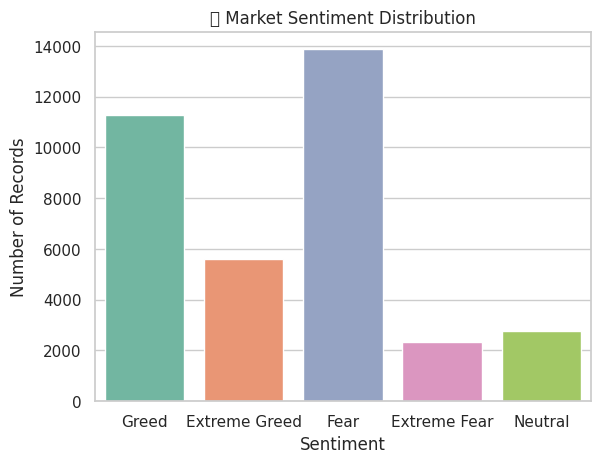

In [39]:
sns.countplot(data=df, x='classification', palette='Set2')
plt.title('🧠 Market Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Records')
plt.show()


## 7.2 – Profitability vs Sentiment

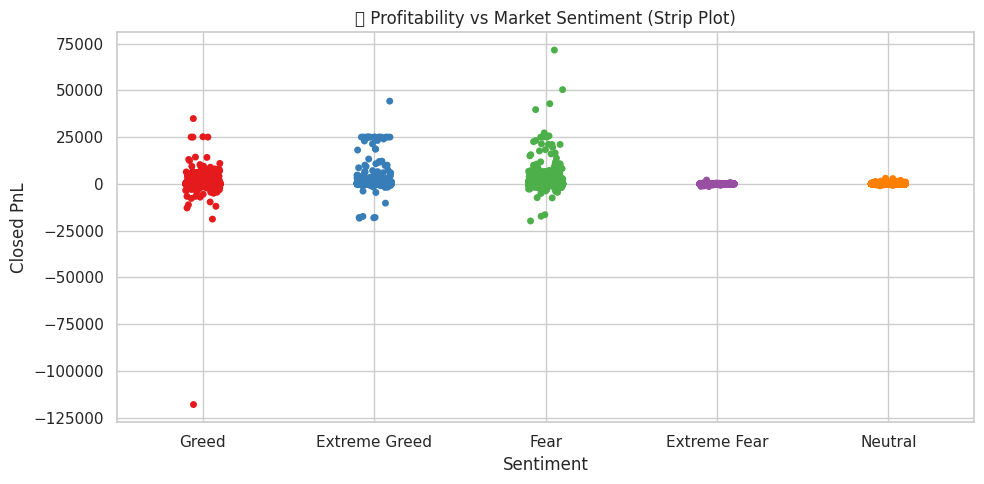

In [53]:
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='classification', y='Closed PnL', palette='Set1', jitter=True)
plt.title('💰 Profitability vs Market Sentiment (Strip Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


## 7.3 – Trade Size vs Sentiment

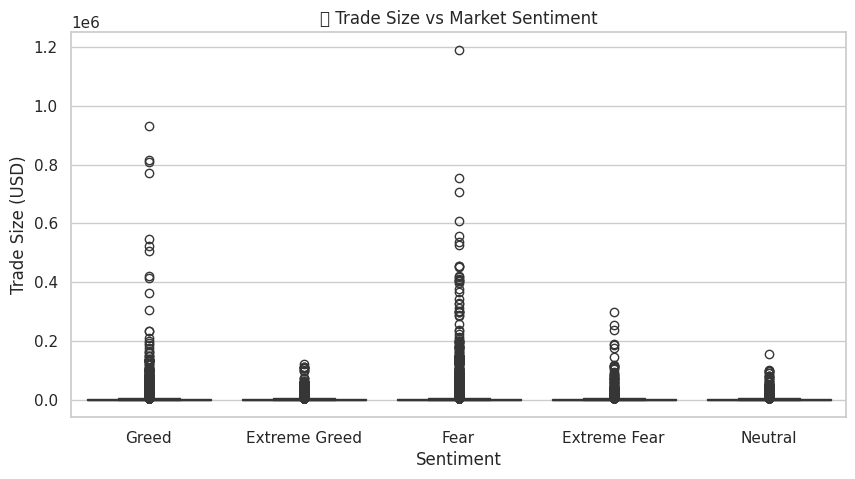

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='classification', y='Size USD', palette='Blues')
plt.title('📈 Trade Size vs Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Trade Size (USD)')
plt.show()


## 7.4 – Interactive PnL vs Size

In [42]:
fig = px.scatter(
    df,
    x='Size USD',
    y='Closed PnL',
    color='classification',
    title='🌀 PnL vs Trade Size (by Sentiment)',
    hover_data=['Account', 'Side', 'Execution Price']
)
fig.show()


# Step 8: Summary Stats by Sentiment


In [43]:
df.groupby('classification')[['Closed PnL', 'Size USD']].agg(['mean', 'median', 'std']).round(2)


Closed PnL                 Size USD                  
                     mean median      std     mean  median       std
classification                                                      
Extreme Fear         1.89   0.00    76.73  4118.76  599.12  15702.85
Extreme Greed      205.82   0.96  1861.56  3242.09  365.00   9048.67
Fear               128.29   0.00  1342.35  5744.78  703.88  26723.28
Greed               53.99   0.00  1399.47  5051.88  675.08  23155.69
Neutral             27.09   0.00   142.95  4332.20  411.81  11913.00

# Step 9: Write Insights (Markdown)

## 🔍 Key EDA Insights

- 🧠 **Sentiment Distribution**: Fear is the most common sentiment, followed by Greed. Extreme sentiments are less frequent.
- 💰 **Profitability**:
   - Median PnL remains low across all sentiments.
   - Fear shows highest volatility in PnL, including both large profits and severe losses.
- 📏 **Trade Size**:
   - Larger trades tend to occur under Greed and Fear.
   - Extreme Fear and Neutral days involve smaller, more consistent trades.
- 🎯 **PnL vs Trade Size**:
   - Most trades are small and low-PnL.
   - Outliers with large size and high/low PnL exist, especially during Greed and Fear.
   - No strong linear correlation between size and PnL — emphasizes behavioral complexity.

## 📌 Strategic Takeaway

Traders respond emotionally to market sentiment:
- Greed = high-risk behavior with potential large gains/losses
- Fear = panic or inconsistent execution
- Suggests opportunity for **risk-adjusted trade strategies** based on sentiment state.
